In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [247]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [248]:
df.loc[df['age']==df['age'].max()]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
57191  81643  23713       2     175    75.0    120     80            1     1   

       smoke  alco  active  cardio  
57191      0     0       1       1

In [249]:
# Add 'overweight' column
df['overweight']=((df["weight"]/(df["height"]**2))*10000>25).astype(int)


In [250]:
a=np.array(1).T
a

array(1)

* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [251]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.
for i in  df.index:
    if df.at[i, "cholesterol"]==1:
        df.at[i, "cholesterol"]=0
    if df.at[i, "cholesterol"]>1:
        df.at[i, "cholesterol"]=1
    if df.at[i, 'gluc']==1:
        df.at[i, 'gluc']=0
    if df.at[i, 'gluc']>1:
        df.at[i, 'gluc']=1
        

# Draw Categorical Plot


In [252]:
titanic = sns.load_dataset("titanic")
titanic.head()


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

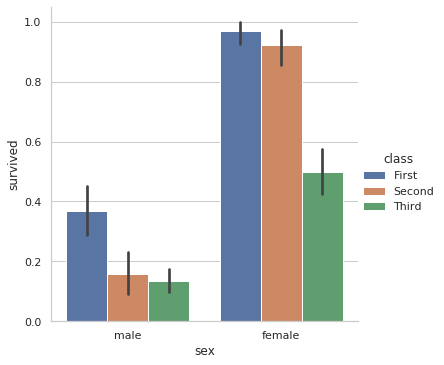

In [253]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [254]:
# Create DataFrame for cat plot using `pd.melt` using just 
#the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

df_cat = pd.melt(df, id_vars=['cardio','id'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])

In [255]:
df_cat.keys()

Index(['cardio', 'id', 'variable', 'value'], dtype='object')

In [256]:
df_cat.loc[df_cat["cardio"]]

cardio  id     variable  value
0        0   0  cholesterol      0
1        1   1  cholesterol      1
1        1   1  cholesterol      1
1        1   1  cholesterol      1
0        0   0  cholesterol      0
..     ...  ..          ...    ...
0        0   0  cholesterol      0
1        1   1  cholesterol      1
1        1   1  cholesterol      1
1        1   1  cholesterol      1
0        0   0  cholesterol      0

[420000 rows x 4 columns]

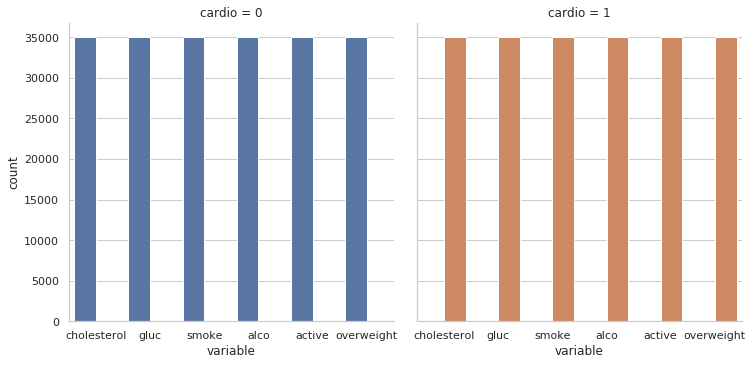

In [257]:
g = sns.catplot(x="variable",col_wrap=4, hue="cardio",kind="count",col="cardio", data=df_cat)

* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile

In [258]:
df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            0     0   
1          1  20228       1     156    85.0    140     90            1     0   
2          2  18857       1     165    64.0    130     70            1     0   
3          3  17623       2     169    82.0    150    100            0     0   
4          4  17474       1     156    56.0    100     60            0     0   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            0     0   
69996  99995  22601       1     158   126.0    140     90            1     1   
69997  99996  19066       2     183   105.0    180     90            1     0   
69998  99998  22431       1     163    72.0    135     80            0     1   
69999  99999  20540       1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1       0           0  
1          0     0       1       1           1  
2          0     0       0       1           0  
3          0     0       1       1           1  
4          0     0       0       0           0  
...      ...   ...     ...     ...         ...  
69995      1     0       1       0           1  
69996      0     0       1       1           1  
69997      0     1       0       1           1  
69998      0     0       0       1           1  
69999      0     0       1       0           0  

[70000 rows x 14 columns]

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# test the seaborn lib üòâ

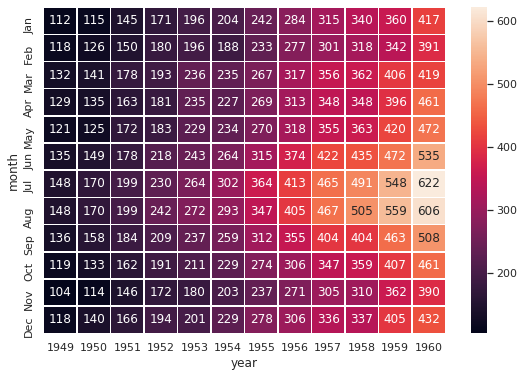

In [243]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

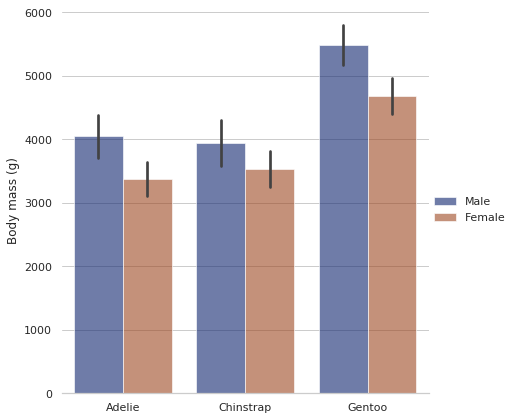

In [244]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")


üòÄ
üòÉ
üòÑ
üòÅ
üòÜ
üòÖ
üòÇ
ü§£

‚ò∫Ô∏è
üòä
üòá
üôÇ
üôÉ
üòâ
üòå
üòç
ü•∞
üòò
üòó
üòô
üòö
üòã
üòõ
üòù
üòú
ü§™
ü§®
üßê
ü§ì
üòé
ü•∏
ü§©
ü•≥
üòè
üòí
üòû
üòî
üòü
üòï
üôÅ
‚òπÔ∏è
üò£
üòñ
üò´
üò©
ü•∫
üò¢
üò≠
üò§
üò†
üò°
ü§¨
ü§Ø
üò≥
ü•µ
ü•∂
üò±
üò®
üò∞
üò•
üòì
ü§ó
ü§î
ü§≠
ü§´
ü§•
üò∂
üòê
üòë
üò¨
üôÑ
üòØ
üò¶
üòß
üòÆ
üò≤
ü•±
üò¥
ü§§
üò™
üòµ
ü§ê
ü•¥
ü§¢
ü§Æ
ü§ß
üò∑
ü§í
ü§ï
ü§ë
ü§†
üòà
üëø
üëπ
üë∫
ü§°
üí©
üëª
üíÄ
‚ò†Ô∏è
üëΩ
üëæ
ü§ñ
üéÉ
üò∫
üò∏
üòπ
üòª
üòº
üòΩ
üôÄ
üòø
üòæ